# California House Price Prediction

<b>Business Understanding

Bagi perusahaan real estat, data harga real estat yang akurat  sangat penting untuk menentukan nilai jual atau beli properti. Tujuan dari proyek ini adalah untuk mengembangkan model prediksi harga real estat yang sangat akurat untuk wilayah sasaran.
Model ini  dilatih  menggunakan data historis mengenai harga properti lokal, karakteristik properti, dan demografi.
Dengan bantuan model ini, diharapkan dapat  menentukan harga jual dengan lebih akurat agar dapat menjual di bawah harga pasar dan menghindari membayar lebih pada saat pembelian. Tujuan utama dari proyek ini adalah untuk meningkatkan keuntungan perusahaan dengan melakukan transaksi perumahan dengan harga yang optimal, tidak terlalu murah dan tidak terlalu mahal.

<b> Tujuan

Tujuan dari proyek ini adalah untuk mengembangkan model prediksi harga real estat yang sangat akurat yang memperhitungkan faktor-faktor seperti lokasi, ukuran, usia properti, dan demografi. Dengan menggunakan model ini, perusahaan real estate berharap dapat meningkatkan efisiensi dalam menentukan harga pembelian dan penjualan real estate serta menghindari kerugian akibat penjualan di bawah harga pasar atau membayar biaya yang tinggi pada saat pembelian. Selain itu, proyek ini bertujuan untuk meningkatkan keuntungan perusahaan dengan melakukan transaksi real estat dengan harga optimal dan menyediakan alat  berharga bagi agen real estat dan pemilik properti untuk menilai harga real estat dengan lebih akurat.

---

# Import libraries and load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings("ignore")


# Data description

In [3]:
df=pd.read_csv('data-california-house.csv')
display(df.head(),df.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


# Data understanding

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (14448, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, nan, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


<b>Variabel tiap atribut terdiri dari :
1. Numerical: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value.
2. Categorical: ocean_proximity.

In [7]:
df.isnull().sum()

longitude             0  
latitude              0  
housing_median_age    0  
total_rooms           0  
total_bedrooms        137
population            0  
households            0  
median_income         0  
ocean_proximity       0  
median_house_value    0  
dtype: int64

Terdapat 137 baris data yang hilang pada kolom total_bedrooms

<b> Deskripsi Variabel Numerikal

In [8]:
features_for_EDA = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
#SUMMARIZING STATISTICS OF THE DATASET 
df[features_for_EDA].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<b> Deskripsi Variabel Kategorikal

Number of properties in each ocean proximity:
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND        2   
Name: ocean_proximity, dtype: int64


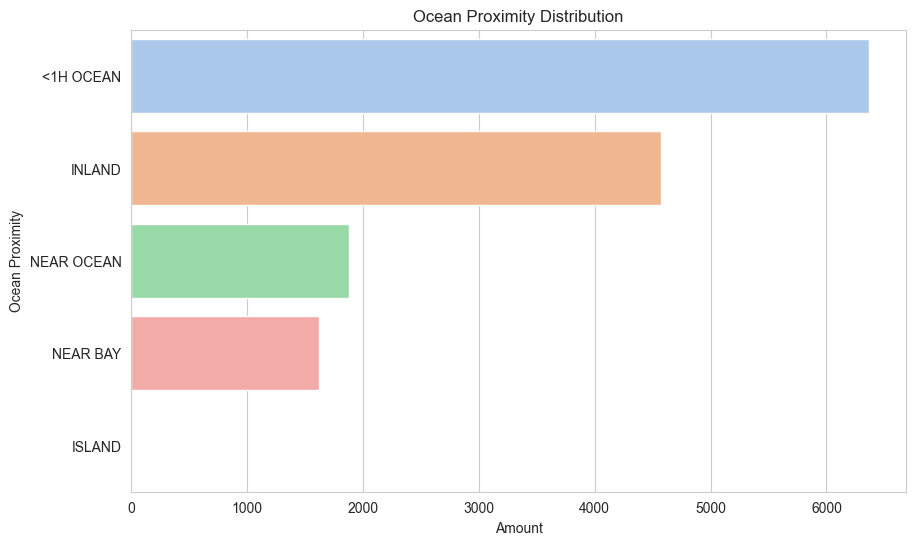

In [9]:
print(f"Number of properties in each ocean proximity:\n{df['ocean_proximity'].value_counts()}")

# Calculate the frequency of each ocean proximity category
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# Set plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") # Set the grid background to white

# Create a horizontal bar plot
sns.barplot(x=ocean_proximity_counts.values, y=ocean_proximity_counts.index, palette="pastel")

# Add labels to the axes
plt.xlabel("Amount")
plt.ylabel("Ocean Proximity")

# Add title
plt.title("Ocean Proximity Distribution")

# Show plot
plt.show()

<b> Location

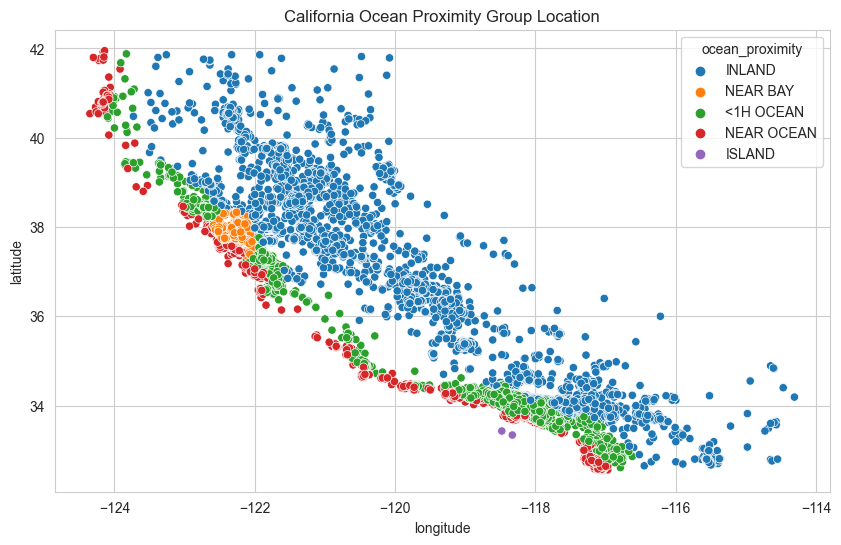

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity')
plt.title('California Ocean Proximity Group Location')
plt.show()

Distribusi lokasi rumah diatas, beradasarkan 'ocean proximity' terlihat mayoritas lokasi rumah di California berada di area INLAND.

<b>Sesuai dengan deskripsi mengenai deskripsi dataset diatas :
1. Dataset memberikan informasi yang relevan untuk di analisis.
2. Terdapat beberapa data yang hilang pada kolom 'total bedrooms' tidak menghalangi kemampuan untuk analisis, namun dibutuhkan penanganan yang tepat.
3. Data ini dapat digunakan untuk menjawab permasalah nilai rumah, dengan catatan bahwa pembersihan (data cleaning) dan persiapan data (data preprocessing) diperlukan sebelum pemodelan.


# Preprocessing

### Missing Value

In [11]:
df.isna().sum()/df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

<AxesSubplot: >

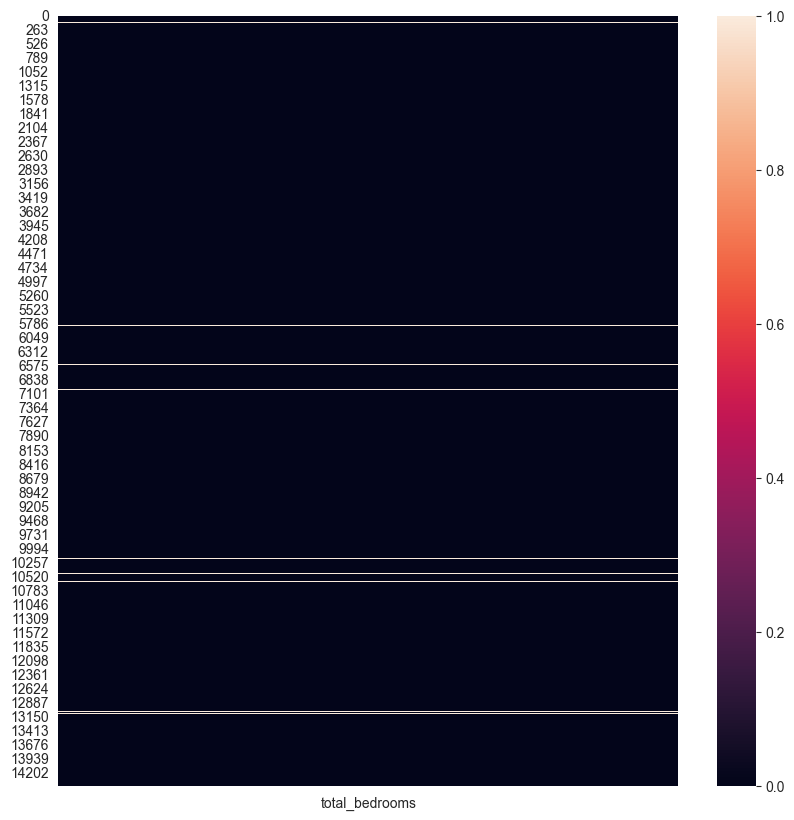

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['total_bedrooms']].isna())

In [13]:
#Untuk mengatasi missing value tersebut kita akan mengisinya dengan nilai rata-rata (mean) dari kolom total_bedrooms
mean = df["total_bedrooms"].mean()
df["total_bedrooms"] = df["total_bedrooms"].replace(np.nan, mean)
df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.000000,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.000000,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.000000,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.000000,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.000000,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.000000,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.000000,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,538.260709,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.000000,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<b> Data Duplicate

In [14]:
df.duplicated().sum()

0

## Outlier

In [15]:
numerical_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households','median_income','median_house_value']
outliers_info = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_info[col] = {
        "IQR": IQR,
        "Lower": lower,
        "Upper": upper,
        "Outliers": len(outliers)
    }

outliers_info_df = pd.DataFrame(outliers_info).transpose()
outliers_info_df

,IQR,Lower,Upper,Outliers
housing_median_age,19.0000,-10.50000,65.50000,0.0
total_rooms,1697.0000,-1094.50000,5693.50000,900.0
total_bedrooms,349.0000,-227.50000,1168.50000,888.0
population,940.0000,-626.00000,3134.00000,827.0
households,325.0000,-208.50000,1091.50000,842.0
median_income,2.1655,-0.67765,7.98435,482.0
median_house_value,144300.0000,-96850.00000,480350.00000,757.0


# Handling Outlier

In [16]:
columns_to_process = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households','median_income','median_house_value']

# Define a function to calculate and create the table


def create_outlier_table(df, column):
    # Calculate the lower and upper bounds for outliers using the IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count the number of outliers and non-outliers
    outliers = len(df[(df[column] < lower_limit) | (df[column] > upper_limit)])
    no_outliers = len(df[(df[column] >= lower_limit)
                      & (df[column] <= upper_limit)])

    # Determine if the column has outliers
    is_outlier = "Yes" if outliers > 0 else "No"

    # Calculate the percentage of outliers
    outlier_percentage = (outliers / (outliers + no_outliers)) * 100

    return {
        "Column Name": column,
        "Is_Outlier": is_outlier,
        "Lower_Limit": lower_limit,
        "Upper_Limit": upper_limit,
        "Outlier": outliers,
        "Outlier_Percentage": outlier_percentage,
        "No_Outlier": no_outliers,
    }


# Create an empty list to store the outlier information for each column
outlier_info = []

# Iterate through the columns and calculate the outlier information
for column in columns_to_process:
    info = create_outlier_table(df, column)
    outlier_info.append(info)

# Create a DataFrame from the list of outlier information
outlier_table = pd.DataFrame(outlier_info)

# Display the outlier information table
outlier_table

,Column Name,Is_Outlier,Lower_Limit,Upper_Limit,Outlier,Outlier_Percentage,No_Outlier
0,housing_median_age,No,-10.50000,65.50000,0,0.000000,14448
1,total_rooms,Yes,-1094.50000,5693.50000,900,6.229236,13548
2,total_bedrooms,Yes,-227.50000,1168.50000,888,6.146179,13560
3,population,Yes,-626.00000,3134.00000,827,5.723976,13621
4,households,Yes,-208.50000,1091.50000,842,5.827796,13606
5,median_income,Yes,-0.67765,7.98435,482,3.336102,13966
6,median_house_value,Yes,-96850.00000,480350.00000,757,5.239480,13691


In [17]:
df.info()
display(df.describe(exclude='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.564381,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,438.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaned

In [18]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(14448, 10)


,dataFeatures,dataType,null,unique,uniqueSample
0,longitude,float64,0,806,"[-122.38, -123.96]"
1,latitude,float64,0,836,"[34.02, 39.66]"
2,housing_median_age,float64,0,52,"[52.0, 43.0]"
3,total_rooms,float64,0,5227,"[5776.0, 796.0]"
4,total_bedrooms,float64,0,1749,"[1874.0, 882.0]"
5,population,float64,0,3498,"[5756.0, 720.0]"
6,households,float64,0,1649,"[1186.0, 198.0]"
7,median_income,float64,0,9797,"[2.5008, 3.4634]"
8,ocean_proximity,object,0,5,"[NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0,3548,"[146700.0, 113800.0]"


# Feature Engineering

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

<b> Data Split

In [20]:
# Split data
seen, unseen = train_test_split(df, test_size=0.2, random_state=42)

# Memisahkan fitur dan target
X = seen.drop('median_house_value', axis=1)
y = seen['median_house_value']

# Split data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menunjukan shape masing masing dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9246, 9), (2312, 9), (9246,), (2312,))

<b> Encoding

Encoding adalah metode yang dapat diterapkan untuk merepresentasikan variabel kategorikal menjadi variabel numerik dalam machine learning. Pada analisis ini metode yang digunakan adala One Hot Encoding fitur kategorik nominal karena fitur ini tidak memiliki banyak nilai unik dan tidak memiliki level untuk setiap nilai.

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND        2   
Name: ocean_proximity, dtype: int64

In [22]:
le=LabelEncoder()
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])
df['ocean_proximity'].value_counts()

0    6369
1    4576
4    1879
3    1622
2    2   
Name: ocean_proximity, dtype: int64

In [23]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [24]:
one_hot = OneHotEncoder()
transformed_df = one_hot.fit_transform(df['ocean_proximity'].values.reshape(-1,1)).toarray()
one_hot.categories_

[array([0, 1, 2, 3, 4])]

In [25]:
transformed_df = pd.DataFrame(transformed_df, 
                              columns = ['<1H Ocean','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])
transformed_df.head()

,<1H Ocean,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [26]:
transformed_df.iloc[90, ]

<1H Ocean     0.0
INLAND        1.0
ISLAND        0.0
NEAR BAY      0.0
NEAR OCEAN    0.0
Name: 90, dtype: float64

<b> Normalization

Normalisasi adalah teknik penskalaan dimana nilai dipindahkan dan diskalakan untuk mencapai rentang 0 hingga 1, karena di dunia nyata tidak tersedia data dalam skala yang sama. Kolom data selalu memiliki skala yang berbeda. Jadi kita bisa menggunakan metode normalisasi untuk membuat semua kolom memiliki skala yang sama.

MinMaxScaler: Untuk setiap nilai dalam fitur, MinMaxScaler mengurangi nilai minimum dalam fitur dan kemudian membaginya dengan rentang. Kisarannya adalah perbedaan antara nilai maksimum dan minimum asli.

In [27]:
temp_df = df[df.select_dtypes(include=np.number).columns.tolist()
]
temp_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.000000,193.0,40.0,1.9750,1,47500.0
1,-122.21,37.77,43.0,1017.0,328.000000,836.0,277.0,2.2604,3,100000.0
2,-118.04,33.87,17.0,2358.0,396.000000,1387.0,364.0,6.2990,0,285800.0
3,-118.28,34.06,17.0,2518.0,1196.000000,3051.0,1000.0,1.7199,0,175000.0
4,-119.81,36.73,50.0,772.0,194.000000,606.0,167.0,2.2206,1,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.000000,712.0,219.0,4.4125,1,144600.0
14444,-120.89,37.48,27.0,1118.0,195.000000,647.0,209.0,2.9135,1,159400.0
14445,-121.90,36.58,31.0,1431.0,538.260709,704.0,393.0,3.1977,4,289300.0
14446,-117.93,33.62,34.0,2125.0,498.000000,1052.0,468.0,5.6315,0,484600.0


In [28]:
normalizer = MinMaxScaler()
temp_df.dropna(axis = 1, inplace = True)
normalized_df = normalizer.fit_transform(temp_df)
pd.DataFrame(normalized_df, columns = temp_df.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0.454183,0.445271,1.000000,0.003372,0.004190,0.005325,0.006413,0.101730,0.25,0.067012
1,0.213147,0.555792,0.823529,0.031111,0.050745,0.023347,0.045387,0.121412,0.75,0.175259
2,0.628486,0.141339,0.313725,0.072215,0.061297,0.038790,0.059694,0.399932,0.00,0.558350
3,0.604582,0.161530,0.313725,0.077119,0.185444,0.085428,0.164282,0.084137,0.00,0.329898
4,0.452191,0.445271,0.960784,0.023602,0.029950,0.016901,0.027298,0.118667,0.25,0.091136
...,...,...,...,...,...,...,...,...,...,...
14443,0.307769,0.608927,0.372549,0.040215,0.035382,0.019872,0.035849,0.269831,0.25,0.267217
14444,0.344622,0.524973,0.509804,0.034207,0.030106,0.018050,0.034205,0.166453,0.25,0.297733
14445,0.244024,0.429330,0.588235,0.043801,0.083374,0.019647,0.064463,0.186053,1.00,0.565567
14446,0.639442,0.114772,0.647059,0.065073,0.077126,0.029401,0.076797,0.353899,0.00,0.968245


<b> Standardization

Standardisasi adalah teknik penskalaan lain di mana nilai berpusat di sekitar rata-rata dengan unit standar deviasi. Ini berarti bahwa rata-rata atribut menjadi nol dan distribusi yang dihasilkan memiliki deviasi standar satuan (yaitu deviasi standar = 1).

In [29]:
standard_scaler = StandardScaler()
standardized_df = standard_scaler.fit_transform(temp_df)
pd.DataFrame(standardized_df, columns = temp_df.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-0.111314,0.513964,1.856210,-1.153589,-1.210440e+00,-1.071870,-1.199496,-1.000304,-0.122120,-1.381090
1,-1.317384,0.999935,1.141712,-0.740637,-4.987802e-01,-0.512516,-0.580834,-0.849386,1.281530,-0.925999
2,0.760844,-0.822456,-0.922393,-0.128737,-3.374707e-01,-0.033194,-0.353731,1.286205,-0.823945,0.684590
3,0.641234,-0.733673,-0.922393,-0.055729,1.560288e+00,1.414342,1.306475,-1.135200,-0.823945,-0.275869
4,-0.121281,0.513964,1.697432,-0.852431,-8.166549e-01,-0.712596,-0.867977,-0.870432,-0.122120,-1.279670
...,...,...,...,...,...,...,...,...,...,...
14443,-0.843927,1.233574,-0.684227,-0.605115,-7.336279e-01,-0.620385,-0.732237,0.288633,-0.122120,-0.539388
14444,-0.659528,0.864424,-0.128507,-0.694550,-8.142827e-01,-0.676929,-0.758340,-0.504030,-0.122120,-0.411096
14445,-1.162887,0.443872,0.189048,-0.551728,2.696878e-16,-0.627344,-0.278029,-0.353747,1.983355,0.714930
14446,0.815665,-0.939276,0.427214,-0.235055,-9.550641e-02,-0.324614,-0.082250,0.933234,-0.823945,2.407869


1. RobustScaler menggunakan median dan rentang interkuartil (IQR), yang membuatnya tahan terhadap pencilan. Hal ini sangat penting terutama dalam data perumahan di mana pencilan seperti rumah mewah atau kondisi pasar yang tidak biasa dapat mendistorsi skala data.
2. Banyak algoritma pembelajaran mesin, terutama yang sensitif terhadap skala seperti SVM atau k-NN, berkinerja lebih baik ketika semua fitur berada pada skala yang sama. 
3. RobustScaler membantu dalam menormalkan data tanpa kehilangan informasi dari rentang data, yang dapat meningkatkan akurasi dan kinerja model secara keseluruhan.

In [30]:
# test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# preprocessing
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Adjusted code setup based on the provided dataset

# Numeric features
numeric_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',]

# Categorical features
categorical_features = ['ocean_proximity']

# Preprocessor for numeric and categorical features
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numeric_features),
    ('One Hot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity'])
], remainder='passthrough')

# Pipeline for feature engineering
feature_engineering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Main pipeline with regression model
pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
   # ('regressor', RandomForestRegressor(n_estimators=100))
])

# Display the final pipeline structure
pipeline

Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   RobustScaler(),
                                                                   ['housing_median_age',
                                                                    'total_rooms',
                                                                    'total_bedrooms',
                                                                    'population',
                                                                    'households',
                                                                    'median_income']),
                                                                  ('One Hot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['ocean_proximity'])]))]))])

<b>Gambaran Umum </b>
1. Pipeline yang dirancang mengintegrasikan langkah-langkah prapemrosesan dan pemilihan model untuk alur kerja machine learning yang kuat dan fleksibel yang disesuaikan untuk memprediksi harga rumah di California.
2. Data Prapemrosesan Memanfaatkan ColumnTransformer, pipeline menerapkan teknik penskalaan yang berbeda untuk fitur numerik dan kategorikal:
    <br>a. Fitur Numerik: Atribut numerik seperti 'housing_median_age', 'total_kamar', dan lainnya, diskalakan menggunakan RobustScaler. Scaler ini sangat berguna dalam mengurangi dampak dari outlier.</br>
    b. Fitur Kategorikal: Fitur 'ocean_proximity' diubah menggunakan OneHotEncoder. Hal ini memastikan bahwa fitur kategorikal ini digunakan secara efektif dalam model regresi.
3. Pipeline Rekayasa Fitur Memasukkan langkah-langkah prapemrosesan ke dalam pipeline memastikan bahwa transformasi data diterapkan secara konsisten selama fase pelatihan dan prediksi.
4. Fleksibilitas dalam Pemilihan Model Pipeline dipersiapkan untuk menyertakan model regresi, meskipun model tertentu belum ditentukan. Hal ini menawarkan fleksibilitas untuk menguji berbagai model regresi seperti RandomForestRegressor, KNeighborsRegressor, LinearRegression, DecisionTreeRegressor, XGBRegressor.

# Data Modeling

In [31]:
from pycaret.regression import *
from pycaret.regression import setup, create_model

setup(data=seen, target='median_house_value', preprocess=False, custom_pipeline=pipeline, session_id=123)

,Description,Value
0,Session id,123
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(11558, 10)"
4,Transformed data shape,"(11558, 13)"
5,Transformed train set shape,"(8090, 13)"
6,Transformed test set shape,"(3468, 13)"
7,Numeric features,8
8,Categorical features,1


In [32]:
top_model=compare_models(n_select=1)

print(top_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,31791.2588,2249622932.1020,47363.9455,0.8308,0.2364,0.1777,3.1020
lightgbm,Light Gradient Boosting Machine,33187.2274,2459044895.7354,49533.9595,0.8151,0.2444,0.1860,0.2710
rf,Random Forest Regressor,34686.2083,2759156312.8812,52467.1341,0.7924,0.2533,0.1934,3.1910
et,Extra Trees Regressor,36976.6393,2992321145.0114,54630.6703,0.7751,0.2628,0.2065,0.9870
gbr,Gradient Boosting Regressor,38886.8008,3074635875.5876,55398.2837,0.7688,0.2717,0.2182,1.0250
knn,K Neighbors Regressor,40379.9285,3611840768.0000,60037.2238,0.7283,0.2857,0.2198,0.0530
br,Bayesian Ridge,50009.5428,4658370189.4859,68212.1710,0.6494,0.3826,0.2895,0.0250
llar,Lasso Least Angle Regression,50008.5118,4658497672.6860,68213.1455,0.6494,0.3817,0.2895,0.0280
lar,Least Angle Regression,50008.3850,4658500838.1122,68213.1680,0.6494,0.3817,0.2895,0.0120
ridge,Ridge Regression,50008.6584,4658463308.8406,68212.8828,0.6494,0.3818,0.2895,0.0140


Evaluasi terhadap berbagai model regresi untuk prediksi harga rumah di California menunjukkan tiga model dengan kinerja terbaik berdasarkan berbagai metrik. Berikut ini adalah wawasan terperinci untuk setiap model:

<br>1. CatBoost Regressor (catboost)</br>
MAE: 31791.258 - Menunjukkan bahwa rata-rata kesalahan absolut dalam prediksi adalah sekitar 31.791.
MSE: 2249622932.1020 - Menunjukkan bahwa prediksi biasanya menyimpang dari nilai aktual dengan akar kuadrat sekitar 2.249.622. RMSE: 47363.9455 - Kesalahan kuadrat rata-rata ini memberi tahu kita bahwa deviasi standar prediksi model dari harga aktual adalah sekitar 47.363.R²: 0.8308 - Menunjukkan bahwa sekitar 83.08 persen variabilitas harga rumah dapat dijelaskan oleh input model.

<br>Catboost menonjol karena akurasi dan kesesuaiannya yang tinggi, menunjukkan kesalahan absolut dan kuadrat terendah serta nilai R-kuadrat tertinggi. Efisiensi waktu pelatihan dan akurasi prediksinya menjadikannya pilihan utama untuk prediksi harga rumah.

<br>2. Light Gradient Boosting Machine (lightgbm)</br>
MAE: 33187.2274 - Model ini meleset dari harga rumah yang sebenarnya sekitar 33.187 secara rata-rata.
MSE: 2459044895.7354 - Kesalahan kuadrat rata-rata ini menyiratkan bahwa prediksi biasanya menyimpang sekitar 2.459.044 dari harga sebenarnya.
RMSE: 49533.9595 - Deviasi standar prediksi model dari harga aktual adalah sekitar 49.533.
R²: 0.8151 - Menunjukkan bahwa model menjelaskan sekitar 81.517% dari varians dalam variabel target.

<br>Model lightgbm mengikuti catboost dengan tingkat kesalahan yang sedikit lebih tinggi tetapi masih menunjukkan kecocokan yang kuat dengan data. Dikenal karena ketangguhannya, model ini dapat menangani fitur dan interaksi non-linear secara efektif.

<b>Create Model

In [33]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30700.8667,2192743125.0137,46826.7352,0.8321,0.2352,0.1703
1,30138.2295,1988161666.4772,44588.8065,0.8453,0.2291,0.1731
2,31843.0470,2179046138.5346,46680.2543,0.8225,0.2359,0.1827
3,31137.5909,2226190592.2474,47182.5242,0.8202,0.2319,0.1725
4,32275.6550,2378654780.8725,48771.4546,0.8262,0.2371,0.1775
5,31186.8787,1918091371.3408,43796.0200,0.8492,0.2285,0.1769
6,34636.2945,2853603560.1397,53419.1310,0.8050,0.2486,0.1783
7,31803.1673,2217952644.9581,47095.1446,0.8380,0.2199,0.1721
8,32644.8357,2381697603.1947,48802.6393,0.8402,0.2395,0.1803


Perbandingan Model: Berdasarkan nilai RMSE, MAE, dan MAPE, dapat menentukan model terbaik dari dua model yang disetel. Sebagai contoh, jika catboost menunjukkan nilai RMSE, MAE, dan MAPE yang lebih rendah dibandingkan dengan lightgbm, maka catboost dapat dianggap sebagai model terbaik.

<b> Hyperparamater Tuning

Hyperparameter tuning, juga dikenal sebagai pemilihan model, adalah proses menemukan kombinasi optimal dari hyperparameter untuk model machine learning Anda dengan tujuan meningkatkan kinerja model. Hyperparameter adalah parameter yang tidak dapat dipelajari secara langsung oleh model selama pelatihan dan perlu ditetapkan sebelum pelatihan dimulai. Sebaliknya, parameter model (seperti bobot dalam jaringan syaraf atau pembagi dalam pohon keputusan) diubah selama pelatihan.

In [34]:
tuned_catboost = tune_model(catboost, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32522.9434,2355240945.0916,48530.8247,0.8197,0.2471,0.1803
1,31613.9124,2101026277.0981,45836.9532,0.8365,0.2349,0.1830
2,32463.9236,2277579342.9558,47723.9913,0.8144,0.2401,0.1853
3,32305.1095,2334505641.8001,48316.7222,0.8115,0.2364,0.1803
4,32951.3125,2310225466.6943,48064.8049,0.8312,0.2389,0.1824
5,32059.0275,2051250537.6869,45290.7335,0.8387,0.2425,0.1856
6,35839.1337,2911650915.6553,53959.7157,0.8010,0.2498,0.1876
7,33780.7711,2400920031.2384,48999.1840,0.8246,0.2321,0.1818
8,34854.2747,2638949247.7908,51370.7042,0.8229,0.2559,0.1932


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


<b> Saving parameters

In [35]:
# Parameter
catboost_params = tuned_catboost.get_params()
catboost_params

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

<b> Evaluasi final model

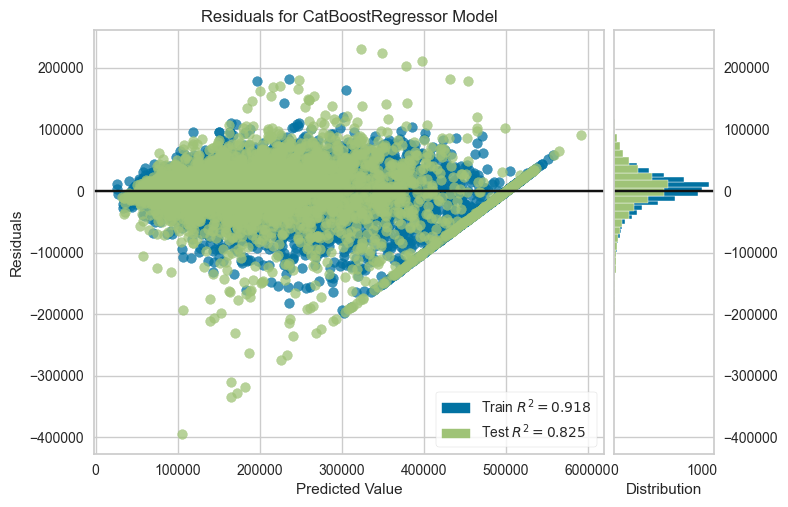

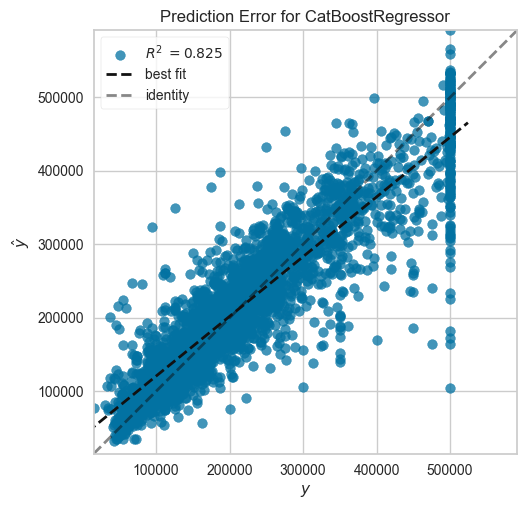

In [36]:
plot_model(tuned_catboost)
plot_model(tuned_catboost, plot = 'error')

In [37]:
print(evaluate_model(tuned_catboost))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

None


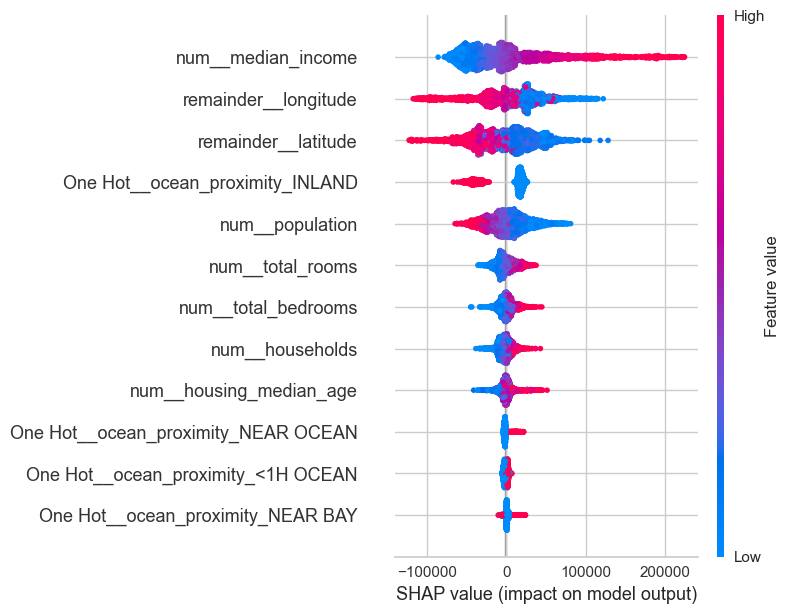

In [38]:
interpret_model(tuned_catboost)

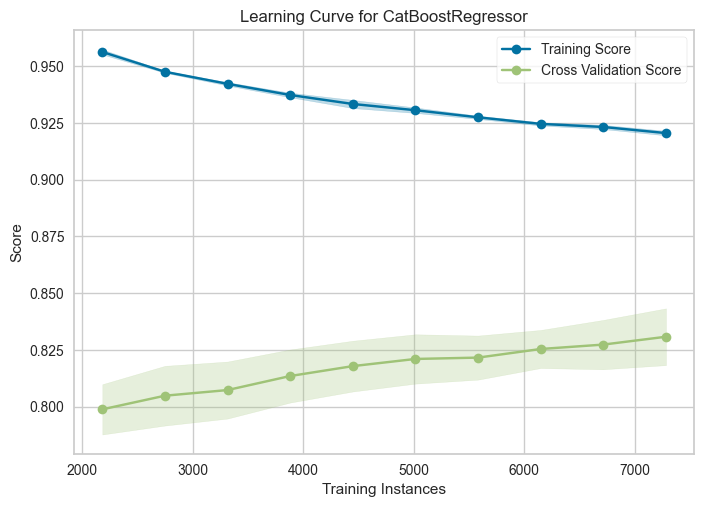

In [39]:
plot_model(tuned_catboost, plot='learning')

Kurva pembelajaran adalah alat penting dalam evaluasi model machine learning. Ini menggambarkan bagaimana performa model berubah seiring dengan penambahan data latih. Terdapat dua garis dalam kurva ini: satu untuk data latih dan satu untuk data validasi.

Underfitting: Jika kedua garis rendah, model tidak belajar dengan baik dan tidak bisa berkinerja baik pada data baru.

Overfitting: Jika garis data latih tinggi dan garis data validasi rendah, model terlalu spesifik pada data latih dan tidak bisa beradaptasi dengan data baru.

Kinerja Optimal: Idealnya, kedua garis mendekat dan tinggi, menunjukkan model yang baik dalam belajar dan menggeneralisasi.

Platue: Peningkatan performa model menjadi lambat seiring dengan tambahan data, menandakan model sudah belajar sebanyak mungkin.

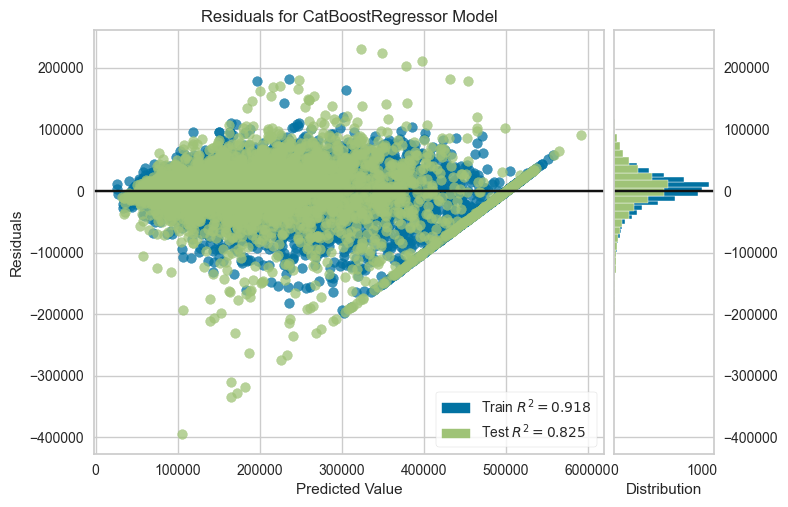

In [40]:
# Plot residual plot untuk menilai performa model regresi
plot_model(tuned_catboost, plot='residuals')

<b>Analisis Residual untuk Model CatboostRegressor</b>
<br>Gambar yang diunggah menunjukkan plot residual untuk model CatboostRegressor. Plot ini berguna untuk mengevaluasi kinerja model dengan membandingkan nilai yang diprediksi oleh model dengan kesalahan (residual) yang dihasilkan.

Poin-Poin

Distribusi Residu: Residu didistribusikan di sekitar garis nol horizontal dan tidak ada pola yang jelas dalam prediksi.

Kepadatan: Histogram di sebelah kanan kurva menunjukkan distribusi frekuensi residual. Kepadatan tertinggi adalah sekitar nol, yang menunjukkan bahwa sebagian besar prediksi mendekati nilai sebenarnya.

Koefisien determinasi (R²): Nilai R² data latih sebesar 0,918 dan nilai R² data uji sebesar 0,825. Nilai tersebut menunjukkan bahwa model memiliki akurasi prediksi yang tinggi dan konsisten antara data pelatihan dan pengujian.

Kinerja model: Model CatboostRegressor menunjukkan kinerja yang baik dalam memprediksi nilai, dengan kesalahan kecil dan konsisten dalam data pelatihan dan pengujian.

Kesimpulan: Kesesuaian antara nilai R² pelatihan dan pengujian menunjukkan bahwa model tidak mengalami overfitting dan memiliki kemampuan generalisasi yang baik.

Peningkatan model: Meskipun model berfungsi dengan baik secara keseluruhan, beberapa outlier dengan nilai sisa yang sangat tinggi atau rendah memerlukan perhatian untuk meningkatkan akurasi model.

Secara keseluruhan, plot sisa menunjukkan bahwa model regresi CatboostRegressor berhasil memprediksi nilai dengan akurasi tinggi.

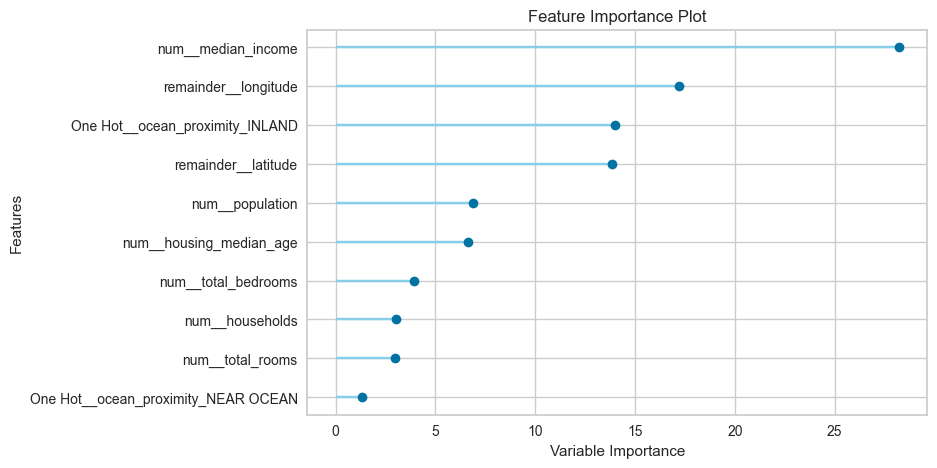

In [41]:
plot_model(tuned_catboost, plot = 'feature')

<b>Analisis Fitur Teratas dalam Prediksi Harga Rumah di California</b>
<br>Dalam konteks bisnis, memahami fitur-fitur yang paling memengaruhi harga rumah di California adalah kunci dalam pengambilan keputusan yang tepat oleh pengembang, investor, dan regulator. Berdasarkan plot di atas, kita dapat melihat bahwa fitur median_income adalah fitur yang paling penting dalam memprediksi harga rumah. Karena fitur ini berhubungan dengan pendapatan rata-rata di area tempat sebuah rumah dibangun, maka evaluasi ini sangat masuk akal. Rumah yang dibangun di area berpenghasilan lebih tinggi kemungkinan besar lebih mahal daripada rumah yang dibangun di area berpenghasilan lebih rendah.

<b> Recursive Feature Elimination</b>
    <br>adalah teknik untuk menentukan jumlah fitur ideal yang dibutuhkan model untuk mencapai performa terbaiknya

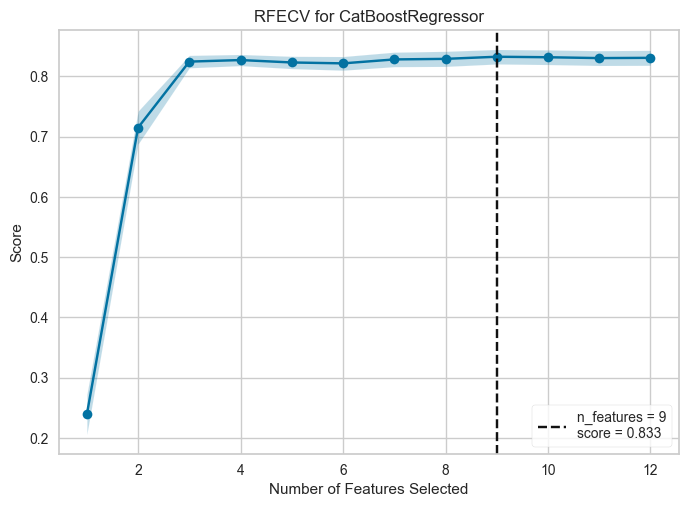

In [42]:
plot_model(tuned_catboost, plot='rfe')

<b>Validation

In [47]:
# train data prediction
validation = predict_model(tuned_catboost)
validation.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,32061.7648,2317586259.8344,48141.3155,0.8253,0.2405,0.1809


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,prediction_label
4163,-118.199997,33.869999,26.0,703.0,202.0,757.0,212.0,2.5250,<1H OCEAN,155500.0,152333.461783
14080,-115.519997,33.119999,38.0,1327.0,262.0,784.0,231.0,1.8793,INLAND,60800.0,75794.264133
2578,-119.660004,37.389999,10.0,2106.0,410.0,1003.0,397.0,2.7813,INLAND,124100.0,94902.665085
260,-118.779999,34.259998,24.0,4072.0,582.0,1834.0,565.0,6.0487,<1H OCEAN,254500.0,273518.042521
8619,-117.489998,33.980000,17.0,2727.0,462.0,1691.0,448.0,4.8371,INLAND,160600.0,151628.938584


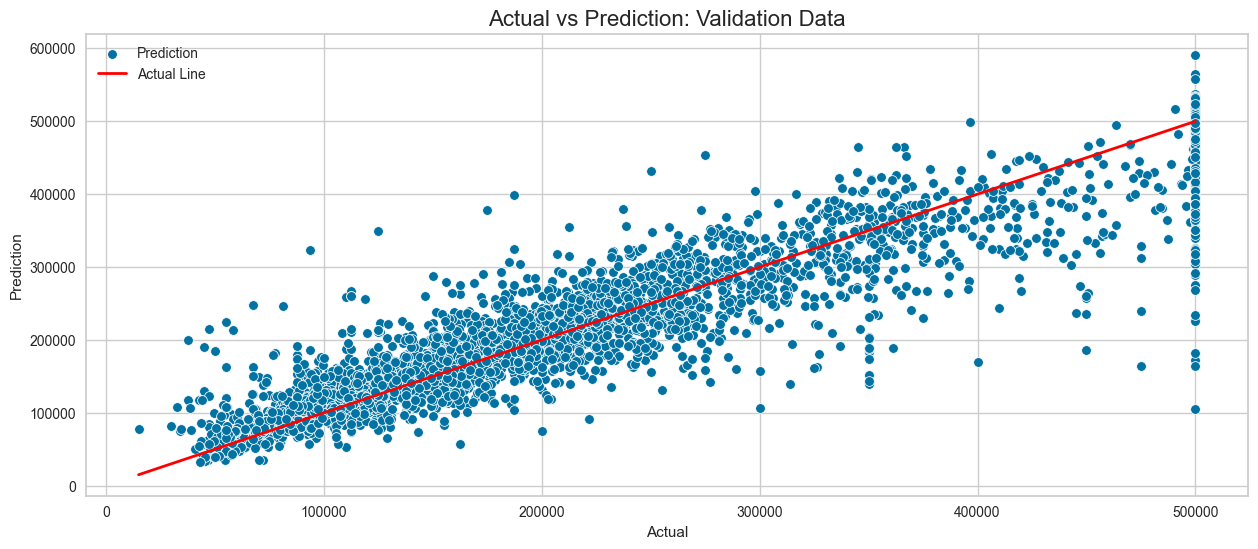

In [48]:
# Create a comparison scatterplot between predictions and actuals
plt.figure(figsize=(15,6))

sns.scatterplot(data=validation, y='prediction_label', x='median_house_value', label='Prediction')
sns.regplot(data=validation, x='median_house_value', y='median_house_value', scatter=False, line_kws = {'linewidth': 2}, color='red', label='Actual Line')

plt.title('Actual vs Prediction: Validation Data', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [50]:
import time
# Calculates the time required to train the model
start_time = time.time()
# lightgbm is a pre-trained model object
catboost = create_model(tuned_catboost)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time required to train an catboost model: {time_taken} detik")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30700.8667,2192743125.0137,46826.7352,0.8321,0.2352,0.1703
1,30138.2295,1988161666.4772,44588.8065,0.8453,0.2291,0.1731
2,31843.0470,2179046138.5346,46680.2543,0.8225,0.2359,0.1827
3,31137.5909,2226190592.2474,47182.5242,0.8202,0.2319,0.1725
4,32275.6550,2378654780.8725,48771.4546,0.8262,0.2371,0.1775
5,31186.8787,1918091371.3408,43796.0200,0.8492,0.2285,0.1769
6,34636.2945,2853603560.1397,53419.1310,0.8050,0.2486,0.1783
7,31803.1673,2217952644.9581,47095.1446,0.8380,0.2199,0.1721
8,32644.8357,2381697603.1947,48802.6393,0.8402,0.2395,0.1803


Time required to train an catboost model: 23.67473292350769 detik


In [51]:
# Test model use data unseen
testunseen = predict_model(tuned_catboost, data=unseen)
testunseen.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,31984.5418,2273277900.9159,47678.9041,0.8297,0.2396,0.1809


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,prediction_label
7834,-117.419998,34.099998,18.0,3977.0,809.0,2231.0,742.0,4.1399,INLAND,115400.0,154154.674772
12458,-117.360001,33.200001,19.0,1926.0,557.0,1190.0,483.0,1.3269,NEAR OCEAN,166100.0,150213.508821
2813,-118.019997,33.900002,34.0,2678.0,511.0,1540.0,497.0,4.4954,<1H OCEAN,202900.0,204421.787260
10483,-117.050003,32.570000,13.0,2880.0,576.0,2450.0,567.0,3.1696,NEAR OCEAN,138000.0,134613.630019
6697,-118.110001,33.869999,33.0,1379.0,254.0,795.0,297.0,4.6713,<1H OCEAN,231800.0,205108.601831


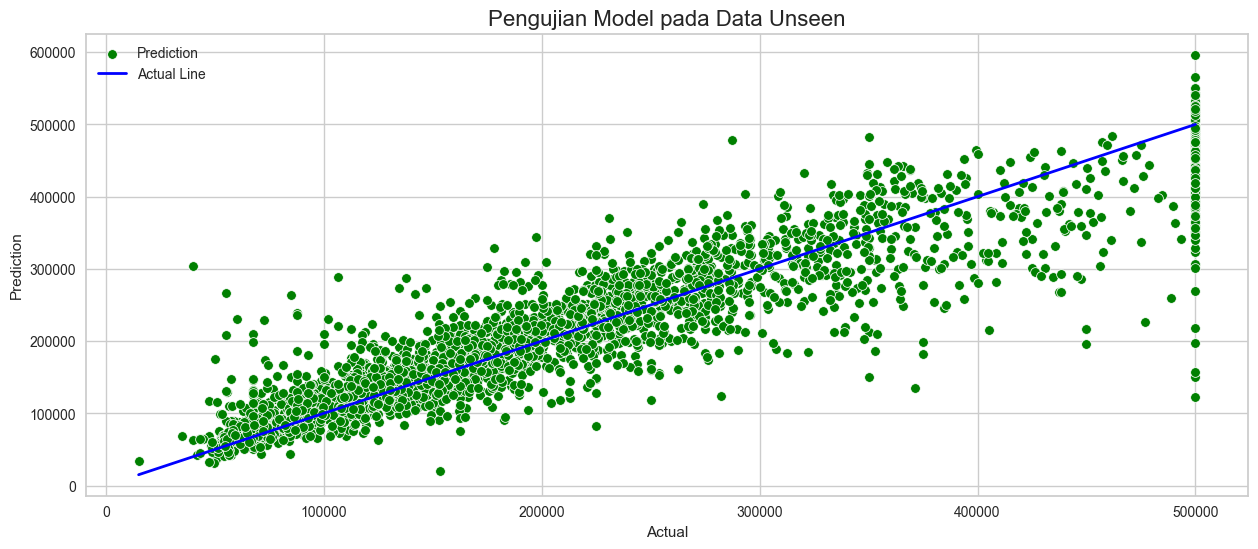

In [52]:
# Create a comparison scatterplot using unseen data
plt.figure(figsize=(15,6))

sns.scatterplot(data=testunseen, y='prediction_label', x='median_house_value', label='Prediction', color='green')
sns.regplot(data=testunseen, x='median_house_value', y='median_house_value', scatter=False, line_kws = {'linewidth': 2}, color='blue', label='Actual Line')

plt.title('Pengujian Model pada Data Unseen', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [54]:
def medvClass(x):
    if 0 <= x < 100000 :
        return '0 - 1000000'
    elif 100000 <= x < 200000 :
        return '100000 - 200000'
    elif 200000 <= x < 300000 :
        return '200000 - 300000'
    elif 300000 <= x < 400000 :
        return '300000 - 400000'
    
    
range_medv = [
    '0 - 1000000', '100000 - 200000', '200000 - 300000', '300000 - 400000'
]

prediction = predict_model(tuned_catboost)
prediction['price_class'] = prediction['median_house_value'].apply(medvClass)
prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,32061.7648,2317586259.8344,48141.3155,0.8253,0.2405,0.1809


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,prediction_label,price_class
4163,-118.199997,33.869999,26.0,703.0,202.0,757.0,212.0,2.5250,<1H OCEAN,155500.0,152333.461783,100000 - 200000
14080,-115.519997,33.119999,38.0,1327.0,262.0,784.0,231.0,1.8793,INLAND,60800.0,75794.264133,0 - 1000000
2578,-119.660004,37.389999,10.0,2106.0,410.0,1003.0,397.0,2.7813,INLAND,124100.0,94902.665085,100000 - 200000
260,-118.779999,34.259998,24.0,4072.0,582.0,1834.0,565.0,6.0487,<1H OCEAN,254500.0,273518.042521,200000 - 300000
8619,-117.489998,33.980000,17.0,2727.0,462.0,1691.0,448.0,4.8371,INLAND,160600.0,151628.938584,100000 - 200000


In [55]:
prediction['price_class'].value_counts()

100000 - 200000    1378
200000 - 300000    852 
0 - 1000000        595 
300000 - 400000    345 
Name: price_class, dtype: int64

In [56]:
from sklearn.metrics import mean_absolute_percentage_error

score = []
for i in range_medv:
    print(i)
    table = prediction[prediction['price_class'] == i]
    mape = mean_absolute_percentage_error(y_pred=table['prediction_label'], y_true=table['median_house_value'])
    score.append(mape*100)

result = pd.DataFrame({
    'Range medv': range_medv,
    'MAPE (%)': score
})
result

0 - 1000000
100000 - 200000
200000 - 300000
300000 - 400000


,Range medv,MAPE (%)
0,0 - 1000000,32.341030
1,100000 - 200000,16.825660
2,200000 - 300000,13.260701
3,300000 - 400000,13.007495


# Conclusions and Recommendations for California House Prediction

1. Model benchmark menggunakan catboost untuk model prediksi California House
2. Model tersebut mencapai nilai R2 sekitar 0.8253, yang menunjukkan bahwa model tersebut menjelaskan sekitar 82,6% varian harga rumah.
3. Rata-rata MAPE adalah sekitar 18,09%, menunjukkan bahwa prediksi menyimpang rata-rata 18,096% dari harga sebenarnya.
4. Dengan model ini, bisnis dapat memperkirakan harga rumah dengan lebih akurat, sehingga membantu pengambilan keputusan investasi dan strategi penetapan harga.
5. Tanpa model ini, bisnis mungkin bergantung pada analisis manual atau heuristik, yang mungkin menjadi kurang akurat dan lebih berisiko.

# Specific and Actionable Recommendations

1. Pastikan data pelatihan dan pengujian representatif dan terkini.
2. Dedikasikan waktu untuk pemeliharaan rutin dan peningkatan guna menjaga keakuratan model.
3. Jelajahi rekayasa fitur lebih dalam untuk mengatasi outlier dan segmentasi pasar.
4. Pertimbangkan untuk menggunakan model ansambel untuk meningkatkan akurasi dan keandalan prediksi.
5. Melakukan pengujian berkelanjutan dengan data pasar terkini untuk memastikan model tetap relevan dengan kondisi saat ini